In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import torch
import numpy as np
from neuralnet import FNet, SQNet
from utils import solve_crocoddyl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ffnet = torch.load("fnet.pth")
sqnet = torch.load("sqnet.pth")

/home/amit/.local/lib/python3.6/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'neuralnet.SQNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
# Generate test data
xrange = np.linspace(-1.,1.,100)
xtest = torch.tensor([ [x1,x2, 0.] for x1 in xrange for x2 in xrange ], dtype = torch.float32)

In [5]:
# Get the true cost by solving crocoddyl
y_true = []
for xyz in xtest:
    xyz = xyz.numpy()
    ddp = solve_crocoddyl(xyz)
    y_true.append([ddp.cost])
y_true = np.array(y_true)
y_true = torch.tensor(y_true, dtype = torch.float32)

In [6]:
# Predictions
sqnet.eval()
with torch.no_grad():
    y_pred = sqnet(xtest)
    
error = (y_true - y_pred)
print(f"Mean Squared Error during testing is {torch.mean(error ** 2)}") 
print("......................................................................")   

Mean Squared Error during testing is 4663468032.0
......................................................................


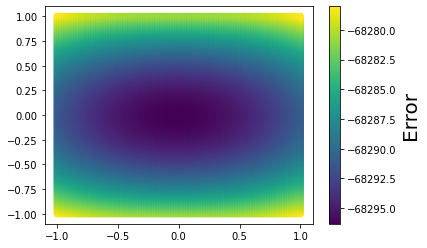

In [7]:
plt.clf()
plt.scatter(xtest.numpy()[:,0], xtest.numpy()[:,1], c = error.numpy())
plt.colorbar().set_label("Error", labelpad = 4, fontsize = 20)
